In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4255.jpg
/kaggle/

# **Convolutional Neural Network**
**A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.**

# ReLU
After feature detectors are applied upon images, ReLU is used to increase non-linearity within images.

# Max Pooling
Take a 2 x 2 box on the top left corner (starting here), and record the maximum number within the box. Slide it to the right with the stride of 2 (commonly used), and move onto the next row if completed. Repaet this step until all the pixels are evaluated. Aim of max pooling is to keep all the important features even if images have spatial or textual distortions, and also reduce the size which prevents overfitting. So, after applying convolution operation to images, than pooling is applied.

Other pooling techniques are also available such as Mean Pooling, which takes the average of pixels within the box.

# Flattening
Flatten the matrix into a long vector which will be the input to the artificial neural network

# Softmax & Cross entropy
Softmax function brings all predicted values to be between 0 and 1, and make them add up to 1. It also comes hand-in-hand with cross-entropy method.

Just seeing how many wrong predictions the classifier made is not enough to evaluate the performance of ANNs. Instead, Cross Entropy should be used to measure how good the model is, as there can be two models that produce same results while one produced better percentages than the other. For classificaion, Cross Entropy should be used, and for regression, Mean Squared Error should be used.

# Importing Libraries

In [2]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import cv2

In [3]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Showing Data 

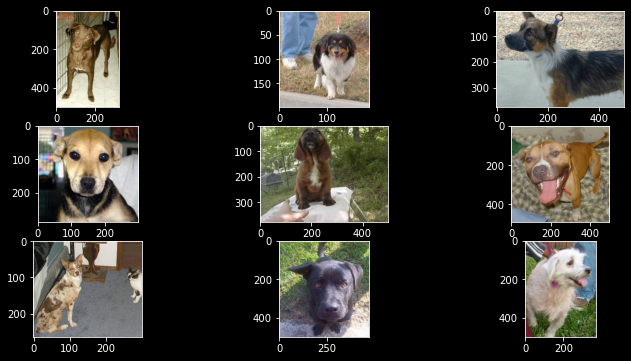

In [4]:
plt.figure(figsize = (12,6))
for i in range(1, 10, 1):
    img = cv2.imread('../input/cat-and-dog/training_set/training_set/dogs/dog.'+str(i)+'.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB ) 
    plt.subplot(3,3,i)
    plt.imshow(img)
plt.show()  

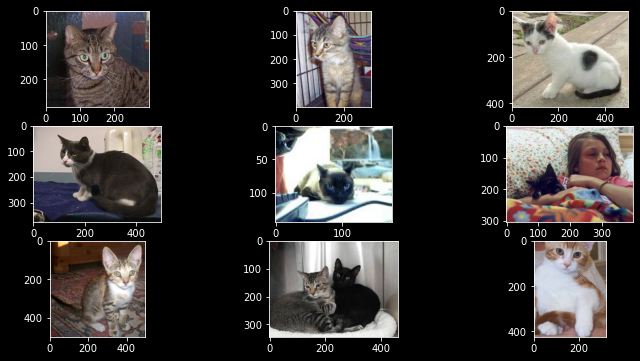

In [5]:
plt.figure(figsize = (12,6))
for i in range(1, 10, 1):
    img = cv2.imread('../input/cat-and-dog/training_set/training_set/cats/cat.'+str(i)+'.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB ) 
    plt.subplot(3,3,i)
    plt.imshow(img)
plt.show()  

# Model Building

In [6]:
model = Sequential()
model.add(Convolution2D(32 , 3, 3,  input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size  = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [7]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training and Testing Data Getting Ready

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, 
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory('../input/cat-and-dog/training_set', target_size = (64,64), 
                                             batch_size = 32, 
                                             class_mode = 'binary')


test_set = test_datagen.flow_from_directory('../input/cat-and-dog/test_set', target_size = (64,64), 
                                             batch_size = 32, 
                                             class_mode = 'binary')

Found 8005 images belonging to 1 classes.
Found 2023 images belonging to 1 classes.


# Fitting the Data and Validation

In [9]:
model.fit_generator(train_set, steps_per_epoch = 100, 
                        epochs = 2, 
                        validation_data = test_set, 
                        validation_steps = 50)

Epoch 1/2
100/100 [==============================] - 41s 411ms/step - loss: 0.0099 - accuracy: 0.9916 - val_loss: 1.3041e-08 - val_accuracy: 1.0000
Epoch 2/2
100/100 [==============================] - 27s 273ms/step - loss: 2.8686e-07 - accuracy: 1.0000 - val_loss: 2.9404e-08 - val_accuracy: 1.0000
